In [ ]:
import torch
import numpy as np
import seaborn as sns
import torch as nn

#create non-linear data
torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y= X + np.sin(X) + np.random.normal(size=X.shape)


<Axes: >

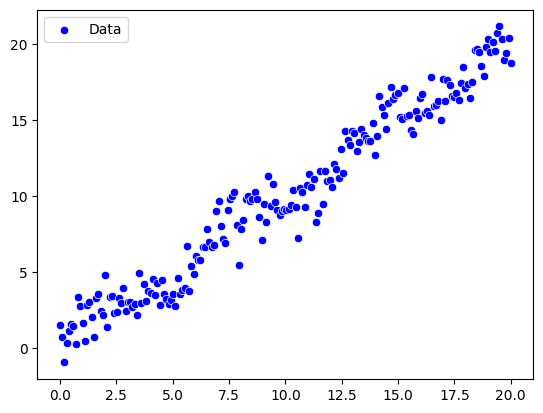

In [ ]:
sns.scatterplot(x=X, y=y ,color='blue',label='Data')

In [ ]:
#we need to make DRegressionDataset iterate on abive data and return x and y
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [ ]:
df = Simple1DRegressionDataset(X,y)


In [ ]:
df[0]
#first item in data

(tensor([0.]), tensor([1.5234]))

In [ ]:
#load data to handel data with network
#make shape of data confrime with pipline of pytorch data
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [ ]:
data_point = next(iter(training_loader))
data_point

[tensor([[8.8442]]), tensor([[8.6350]])]

In [ ]:
# construct the model using Linear block
in_features = 1
out_features = 1
import torch.nn as nn
#we make very simplw neron netwoek take input and get output
model_2 = nn.Linear(in_features,out_features)


In [ ]:
#loss function using mean square error
loss_fn = nn.MSELoss()


In [ ]:
#optimizer => update weight of model
#lr => learning rate
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.001)

In [ ]:
# so we need now a training loop
#to update weights

from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels) #measure how far from target

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



<ipython-input-13-382ec5048e31>:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=10
                )


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

172.10279846191406
559.8406219482422
563.1651608943939
721.2258450984955
736.6360909938812
741.2762477397919
741.2784901168197
742.5123037602752
743.8110545184463
744.5823878552765
746.0051199700683
746.0057239239104
747.0157127087004
747.3874179725535
749.3036893014796
750.3807415370829
752.06812959956
753.3404496316798
755.1576585178263
755.7904071216471
755.9050791491754
756.4906213511713
756.595196895767
762.2183315088041
763.0624222089536
763.0862294402905
764.1908196178265
765.8213019338436
765.8687097583897
768.6445974861272
769.3394536529668
769.4306689132936
769.9404196371324
776.2556438078173
777.8030361761339
778.2922791768797
778.7870596577413
779.2664113570936
786.0693140556104
786.5806879331358
788.235567026306
789.1123252441175
789.2269456018694
792.803886376787
796.2195052732714
801.1014423002489
801.3654402424581
803.5141113926657
808.239092700649
808.4808415998705
809.8702954878099
809.9605913911946
810.269142285455
810.3646468748339
811.1932109822519
812.960667036939

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.19128255546092987
0.36435988545417786
0.40059030801057816
2.4034711197018623
2.88130009919405
7.30903971940279
9.40211046487093
9.419550700113177
11.436646981164813
17.538264317438006
21.569023175165057
21.569285937963286
25.402068444906035
25.844383457122603
26.644838371692458
27.91818265002803
31.177574911533156
31.17763423039287
31.709911337631638
37.482601156967576
40.35416077687114
40.92388575388759
41.31350528313487
41.31580053460493
41.5335378516902
43.13623534333601
46.47081171166792
46.52501565781131
46.605795433788444
47.24574541118636
47.576255044012214
48.1878828015615
51.223226448564674
52.16168775227561
54.12760450509086
57.5978086200048
60.239930888681556
60.735039433508064
65.80322857764259
66.24008812573447
66.670999428301
67.90692784455314
73.56906106141105
75.49337269928947
75.61857332852378
78.77504315045371
86.5114079919149
89.51327504780784
90.08744498160377
93.92802091506019
93.92804855748545
95.25004977628123
95.77422297641169
97.22123253985774
101.27256644412

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.483296871185303
4.854549914598465
4.998690456151962
7.606639713048935
7.713892437517643
7.742291418835521
9.223937002941966
12.037296978756785
17.198162285611033
17.199181686737575
17.343478154041804
17.373680116259493
17.56883543881122
18.865767420851626
19.055468083941378
23.46012020262424
25.406030418002047
26.69723868521396
27.588468076311983
28.5322505250806
28.547849608235992
33.56853385048453
34.43778224068228
38.018209410482086
41.370281887822784
41.37645354180131
42.503411077545024
43.24448587803636
46.77550747303758
47.08215820102487
47.55462303070817
49.88212695030961
50.44001337199006
50.440871399478056
52.53728525026236
52.64060998393688
58.31441569759045
58.5271662218729
58.71183035208378
60.134266708628275
60.74339625670109
60.8023511065403
61.05273463262711
69.361165304319
70.4121610118309
70.65284152759705
70.66970289929304
83.75834406598005
90.35022963269148
93.79649127705488
96.7887641309062
96.79303170752246
99.92175532889087
99.93588875525165
105.42975233786274
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.014912804588675499
1.040116986259818
1.0441117081791162
1.9822578821331263
2.842860022559762
3.1289871726185083
3.1689485777169466
3.905863570049405
4.180082069709897
4.181168867275119
4.206795986741781
6.776605900377035
8.843785341829062
11.82041197642684
11.826001812238246
11.915694911498576
12.101772327441722
12.267814029473811
14.088230003137141
14.175854195374995
14.951537300366908
17.325757910031825
17.32695726666134
17.61401436838787
18.578635018202476
18.601134903612547
19.85498190659564
19.90161940443795
20.72317054856103
20.806889854255132
22.14794131356757
24.798338614287786
29.227330408873968
32.050990067305975
41.860127411666326
43.20082911092322
46.16868575650733
46.5517994685797
46.67530447978061
46.695666396874
47.67657049919944
48.07505836512428
48.95893909956794
49.932474696892314
50.013393858331256
51.09168169822078
52.93902597751003
53.228729763883166
54.51515046681743
63.990931907552294
64.05406435753684
65.58410235668998
66.19900199200492
66.4839506688295
66.740

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.328452467918396
0.7740590274333954
5.1380517184734344
5.138059409582638
5.251895891749882
5.658829795444035
12.325890170657658
14.543974982821965
14.930211173617863
14.967237549150013
18.61497266801598
19.376684027040028
19.539733084166073
20.139092834913754
20.14205587586912
21.430764205069863
23.839666611762368
24.387244410128915
29.368954844088876
29.510904020877206
32.21046466311964
33.262498921962106
33.60139945826086
36.385882652612054
37.54763988337072
38.32588014683279
38.61591613969358
39.350514478297555
47.69163424453291
49.667668885798776
49.898008934469544
55.21336900374445
56.25486945292505
57.62459098479303
57.73545343360456
59.16978318175825
59.83749098262342
59.875102660866105
61.70213057777437
63.433768174858415
64.90211095592531
64.91942465795728
65.2724086393282
65.7900348056719
65.87671583636256
68.3822326038644
68.38933009958419
69.44213337755355
75.70884079790267
75.92506105756911
76.24593545055541
76.27779708361777
76.35813781178149
76.97345557367953
77.4914976

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

14.57695484161377
14.642750583589077
21.60816367715597
21.611134094418958
23.396500152768567
30.330060047330335
32.7500439111609
36.56108383578248
36.7094434176106
38.16020211321302
40.223833170952275
41.62435492617078
42.21146091562696
43.36749765020795
44.38590451818891
45.21145996195264
46.1926399145741
47.58621296030469
51.42110571009107
55.815540162147954
57.77148636919446
57.844522637547925
58.893833440961316
59.22709451359697
61.550921065034345
61.576627786504105
61.66416815225966
61.765192601131275
63.05596086685546
65.35285446350463
69.16011974518187
69.77293023769744
69.77524233376607
70.02191940462217
70.03900790726766
70.482757513877
72.38976985728368
72.60952315246686
74.0338597050868
76.96144745266065
77.98164424812421
78.541485582944
79.72076443349943
82.18962386762723
82.34092256939039
84.24931535637006
84.51245549833402
86.37969151651487
91.0429653278552
91.42436853563413
93.72767606889829
93.87236404931173
93.94365010177717
96.40193257248029
96.82672504102811
104.5601

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.1574534922838211
0.41731156408786774
0.4300812454894185
2.5928946705535054
5.444582101888955
8.801339981146157
8.880985354073346
8.952161450870335
9.231719304807484
11.381503631360829
14.519369889982045
16.479117800481617
16.48956742323935
16.653211602941155
18.947469720616937
19.285198727622628
20.77763239480555
23.210016885772347
23.210228955285857
23.41735110236914
24.65679142429144
24.678899640130112
24.68069209708483
25.84646370066912
26.08513799859793
27.179995333688566
27.61218655659468
31.519843703048537
36.08042347981245
38.54963648869307
39.8001369292906
39.98830755605013
41.29729958428652
41.30060790517018
43.94447587468312
44.12430992760346
45.11899456419633
52.48674091734574
52.607172422489384
55.36809366234229
55.4254644405155
58.01771383397863
58.27445151322172
62.024811048439005
62.712573904922465
63.887519497802714
64.00054945462034
76.02299894802854
79.26434554570005
79.418096635869
79.52197900824831
84.03805414252565
84.04338202197687
84.1876056822075
90.8954346807

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.1886284500360489
2.4847445636987686
2.492998263798654
4.6312533831223845
5.601149401627481
6.311615786515176
8.729325137101114
8.937672591768205
16.012825465761125
16.71037147101015
18.111319876275957
18.88832554873079
20.53080818708986
21.949375486932695
24.283593750558794
26.64778862055391
26.651696062646806
26.78998178895563
27.907122320495546
28.96759159024805
32.86007816251367
33.01334854122251
33.06687508802861
35.597378122620285
36.0603036461398
38.586733299307525
38.599093723110855
38.68277494888753
39.836788463406265
40.429686951451
42.274761009030044
42.277598331682384
42.3406991539523
42.708021777682006
52.93676246982068
54.74560798984021
55.04432677011937
60.021211135201156
60.1238962886855
60.16699548345059
60.25476652663201
64.17172128241509
66.87878257315606
66.91527440678328
66.98409997206181
66.98996790871024
67.97673490270972
67.99505574814975
74.0073581468314
80.35704906098545
81.29428125731647
90.43169618956745
90.74337912909687
91.98707045428455
96.00207795016468

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.058025017380714417
0.7166007310152054
0.7590928748250008
2.702847547829151
3.323067493736744
3.6413699463009834
4.5076209381222725
5.110615737736225
11.986781127750874
12.807142205536366
13.05415142327547
15.5327123478055
16.162380047142506
17.28895289450884
17.308005452156067
17.600231975317
18.468269735574722
18.468681841332
18.4691908864188
18.596483579080086
24.876555791299324
25.683777442376595
25.870027264754754
27.915574511687737
29.661621293227654
33.44242330471752
33.505579238932114
34.38089323620079
34.38228069531033
36.264831411710475
39.31384621845791
46.07521449314663
46.24167926894734
49.61076315032551
50.979730325809214
50.98228736250894
51.141870767169166
51.14366770867491
52.559780370036606
55.33280230645323
56.707658420840744
57.08184472803259
58.65281526331091
66.55192987207556
67.06118021492148
70.37037930969382
70.73070026520872
71.63453764800215
72.17737425450468
74.60844124440337
74.84666056517744
75.15227286104346
79.17346112016821
92.15372769121313
92.1655172

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.3489159643650055
0.40959227085113525
5.443175435066223
13.319087624549866
17.363863110542297
18.2250674366951
18.381359800696373
18.38827886339277
18.64461176749319
20.513374379836023
20.800574055872858
20.958852640353143
21.580692938528955
22.505867472849786
22.619424833916128
23.092036499641836
23.092182522872463
27.834001427749172
30.202056532958522
30.204343020450324
30.876218258868903
33.96748775197193
33.98171634739265
35.14159686630592
35.29167832201347
37.11207176512107
39.18963028257713
40.11885227030143
40.20383903151378
40.205373714794405
40.290229301084764
40.302054694038816
40.814675977570005
45.700550725799985
48.43454234872479
49.16857313190121
51.23391031299252
53.3789517787518
59.88025163684506
60.02718321059365
60.18258387420792
64.11994582985062
69.78698427055497
69.92029753897805
72.29523674224038
72.68271503422875
74.32160267804284
74.42183127079625
76.10791387234349
76.18321433488745
81.39011826936621
81.39620585099328
82.7223991836654
82.82336089864839
82.83695

In [ ]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

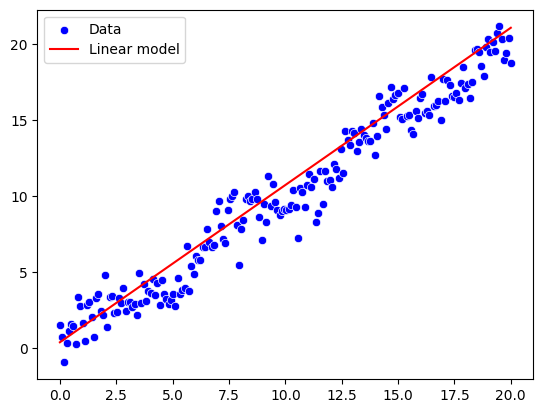

In [ ]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
